In [2]:
import itertools
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import vertex_model as model
# from vertex_model.run_select_nosaveinfo import run_simulation_INM, definecolors, run_simulation_no_INM
import itertools
import numpy as np
import matplotlib.pyplot as plt
import vertex_model as model
import vertex_model.initialisation as init
from vertex_model.forces import TargetArea, Tension, Perimeter, Pressure
import os
import seaborn as sns
import warnings
import matplotlib.colors as colors
warnings.filterwarnings('ignore') #Don't show warnings
from Gobal_Constant import dt, viscosity, t_G1, t_G2, t_S, A_c, J, pos_d, T1_eps, P, microns, time_hours, expansion_constant #file with necessary constants

sns.set_style("whitegrid")

In [3]:
# run simulation
def run(simulation,N_step,skip):
    return [cells.copy() for cells in itertools.islice(simulation,0,N_step,skip)]

#simulation without division
def basic_simulation(cells,force,dt=dt,T1_eps=0.04):
    expansion = np.array([0.0,0.0])
    while True:
#         print cells.properties['parent_group']
        cells.mesh , number_T1, edg_rem = cells.mesh.transition(T1_eps)
#         cells.properties['Gamma'][cells.mesh.face_ids == 50]=np.array([0.0])
        F = force(cells)/viscosity
#         expansion = 0.05*np.average(F*cells.mesh.vertices,1)*dt
        dv = dt*model.sum_vertices(cells.mesh.edges,F) 
#         cells.mesh = cells.mesh.moved(dv).scaled(1.0+ expansion)
        if hasattr(cells.mesh.geometry,'width'):
            expansion[0] = expansion_constant*np.average(F[0]*cells.mesh.vertices[0])*dt/(cells.mesh.geometry.width**2)
        if hasattr(cells.mesh.geometry,'height'): #Cylinder mesh doesn't have 'height' argument
            expansion[1] = np.average(F[1]*cells.mesh.vertices[1])*dt/(cells.mesh.geometry.height**2)
        cells.mesh = cells.mesh.moved(dv).scaled(1.0+expansion)
        yield cells

In [4]:
def definecolors(cells):
    peach = '#eed5b7'
    light_blue ='#87cefa'
    pink = '#ffc0cb'
    light_green = '#98fb98'
    import matplotlib.colors as colors
    vv=sns.color_palette("hls", 10)
    v=[colors.rgb2hex(colorrgb) for colorrgb in vv]
    palette = np.array([light_green, pink,light_green,'g','r','g','m','c','',peach])
    palette = np.array([v[1],v[0],v[1], v[1],v[4],v[5],v[6],v[7],v[8],v[9],peach])
    colors = cells.properties['parent_group']
    return palette[colors]

In [5]:
#rand =  np.random.RandomState() #random number to choose Lambda
#mesh = init.toroidal_hex_mesh(10,10,noise=0.2,rand=rand)

In [6]:
Inicial= (np.array([[-4.96948534, -2.27493673],
        [-4.85593462, -4.84847153],
        [-4.42579353, -2.48709709],
        [-4.40797208,  4.05892084],
        [-4.37720576,  3.10500471],
        [-4.25005382,  2.35082301],
        [-4.2021099 , -0.64596478],
        [-4.07852935,  1.41728565],
        [-4.01510873,  4.32215623],
        [-3.98274977,  1.95310037],
        [-3.97113124,  3.49269005],
        [-3.96232732,  1.80179457],
        [-3.77576236, -3.21221458],
        [-3.72184049,  1.65979836],
        [-3.65129702, -1.04173363],
        [-3.63080051,  0.32487358],
        [-3.554083  , -0.78016779],
        [-3.50252526, -0.81728404],
        [-3.47068436,  2.54613848],
        [-3.4135644 , -3.00450416],
        [-3.05552536, -0.33827627],
        [-2.94586975,  2.99370784],
        [-2.67191649, -3.11087019],
        [-2.47184734, -2.01308671],
        [-2.41095504,  2.10599639],
        [-2.29306332,  2.08747388],
        [-2.05668996, -4.46429447],
        [-1.94935144, -1.64141666],
        [-1.62178351, -0.5512023 ],
        [-1.2964901 ,  2.81245151],
        [-1.25855943,  2.69559981],
        [-1.2505415 ,  1.33329631],
        [-1.17005457,  4.44966318],
        [-1.07200114,  4.91588219],
        [-1.05564704,  0.97511893],
        [-1.02812175,  4.48899021],
        [-1.00691079,  4.69314216],
        [-0.97901463, -3.90330915],
        [-0.83649453,  4.2558946 ],
        [-0.77391311,  0.51087889],
        [-0.17506772, -3.80127783],
        [-0.05782086, -3.68257114],
        [-0.02415112, -0.16391721],
        [-0.0147513 ,  4.39507102],
        [ 0.08307815,  0.20712474],
        [ 0.17499817, -1.04227492],
        [ 0.19817694, -3.84393091],
        [ 0.26933509, -1.82354156],
        [ 0.35193685, -4.47189135],
        [ 0.48741043,  0.34738048],
        [ 0.56527229, -4.30853649],
        [ 0.95670968,  4.08811183],
        [ 1.25967437,  2.47728415],
        [ 1.27196914,  2.11023482],
        [ 1.31950795,  2.79377401],
        [ 1.39985117, -1.24773858],
        [ 1.42673383, -4.1693048 ],
        [ 1.44777637, -3.01154305],
        [ 1.58517964,  2.68458773],
        [ 1.60508424,  4.3688634 ],
        [ 1.65125946,  1.40851691],
        [ 1.77995676,  4.46948842],
        [ 1.85355853,  4.48298822],
        [ 1.88217511, -1.46246   ],
        [ 1.97514792, -0.20135748],
        [ 2.13394392,  2.90723657],
        [ 2.24806306, -3.60255883],
        [ 2.38919045, -3.56493398],
        [ 2.44954489,  2.65674475],
        [ 2.46312366,  0.08034192],
        [ 2.55624124, -1.87390487],
        [ 2.70892131,  0.49407412],
        [ 2.72111153,  4.0114146 ],
        [ 2.86313646, -1.7945705 ],
        [ 3.00451962,  1.99331974],
        [ 3.28712487, -3.31747069],
        [ 3.33435025,  2.42724808],
        [ 3.35848035, -1.15667846],
        [ 3.38560284,  2.24275236],
        [ 3.39168596,  4.59078751],
        [ 3.51080355, -0.68384812],
        [ 3.61467426,  3.47847356],
        [ 3.83858368,  2.89929237],
        [ 3.87332554,  0.83213183],
        [ 4.0407267 ,  3.67633878],
        [ 4.07352562, -3.45414002],
        [ 4.14312852, -3.59010979],
        [ 4.2234939 ,  2.89416593],
        [ 4.26201742,  1.64322105],
        [ 4.42194032, -3.42762855],
        [ 4.55508294,  2.7847523 ],
        [ 4.58638242,  4.21589939],
        [ 4.68931495,  4.31917885],
        [ 4.6900183 ,  2.00718015],
        [ 4.77768163,  4.52803861],
        [ 4.81559943, -4.14635291],
        [ 4.81834078,  4.99816004],
        [ 4.85894095, -1.40352292],
        [ 4.8852447 , -1.61419349],
        [ 4.89451995,  3.7705346 ]]), 10, 10)

# Con 10 celulas en el eje X 
# Con expansion_constan= 1 (1./expansion_constant) = 1


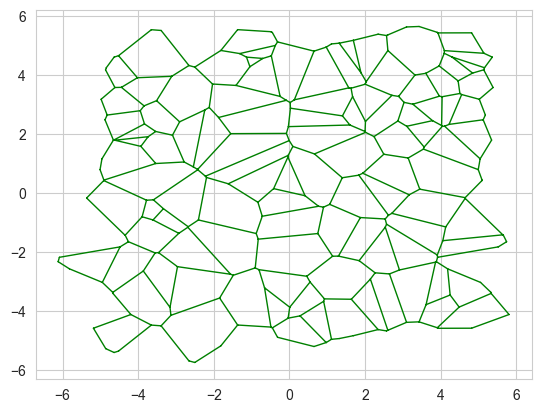

In [7]:
K=1.0 #area elasticity
G= 0.04 #contractility of the cell
L=0.075 #line tensions

#Line tensions can be reduced by increasing cell-cell adhesion or reducing actin- myosin contractility

#run simulation with the choosen parameters
rand =  np.random.RandomState() #random number to choose Lambda
params = [K,G,L]  # K=x[0],G=x[1],L=x[2]
mesh = init.toroidal_ic_mesh(Inicial)
model.plotting._draw_edges(mesh, plt) 
cells = model.Cells(mesh,properties={'K':K,'Gamma':G,'P':0.0,'boundary_P':P,'Lambda':L, 'Lambda_boundary':0.5, 'A0':1.0})
force = TargetArea() + Tension() + Perimeter() + Pressure()
history_init_10= run(basic_simulation(cells,force),50,1) #200/dt



In [9]:
expansion_constant = 1
cells = history_init_10[-1].copy()
cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
cells.properties['parent_group'][cells.mesh.face_ids == 1] = 1
cells.properties['Gamma']= np.array([G,0])[cells.properties['parent_group']]
cells.properties['Lambda']= np.array([L,0.58])[cells.properties['parent_group']]
force = TargetArea() + Tension() + Perimeter() + Pressure()
history_10= run(basic_simulation(cells,force),3,1) #200/dt

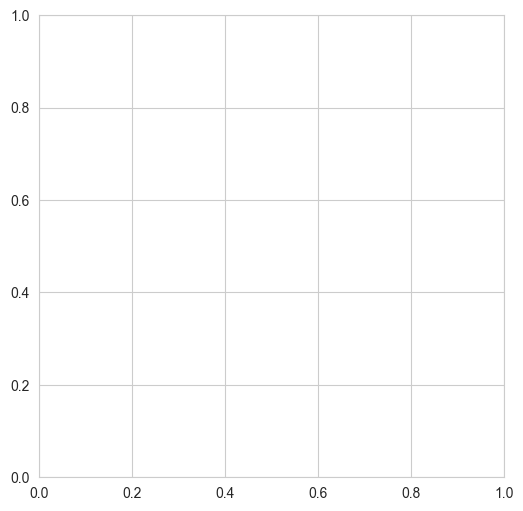

<Figure size 640x480 with 0 Axes>

In [10]:
for cells in history_10:
    cells.properties['color'] = definecolors(cells)
#     cells.properties['color'][cells.mesh.face_ids == 930 ]= 'b'
#     print(cells.mesh.area[cells.mesh.face_ids == 930] )

# definition of the frame for the interactive video
history_10_plot = history_10#[0:50]#+history1
fig=plt.figure()
fig.set_size_inches(6,6);
ax = fig.gca()
# initialization function: plot the background of each frame
def init_fig():
    ax = plt.figure();
    return (ax,)
# animation function. This is called sequentially
def animate_fig(i):
    cells_array=history_10_plot
    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))
    size = 2.0*v_max
    cells= history_10_plot[i]
    return model.draw(cells,ax,size)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,
                               frames=(len(history_10_plot)))

In [8]:
HTML(anim.to_html5_video())

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Area')

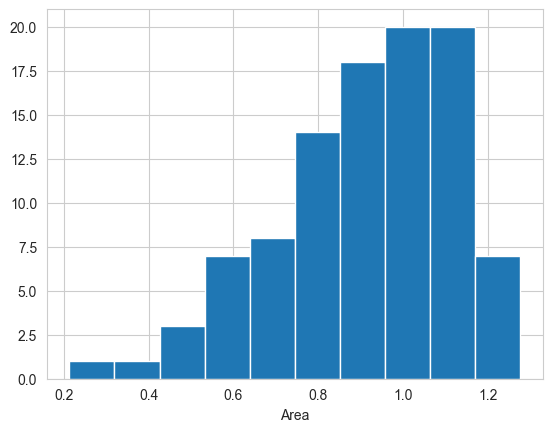

In [10]:
generation1=[cells.mesh.area for cells in history_init_10+history_10]
#print generation1[-1]
ii=0
generation1=generation1[-1]
n=len(generation1)
a=[]
for i in range(n-1):
    if generation1[i]>0:
        ii=ii+1
        a.append(generation1[i])
        

#fig=plt.figure()
#plt.hist(generation1)
fig=plt.figure()
plt.hist(a)
plt.xlabel('Area')

In [12]:
force = TargetArea() + Tension() + Perimeter() + Pressure()
generation_a=[cells.mesh.area for cells in  history_init_10+history_10]
generation_p=[cells.mesh.perimeter for cells in history_10]
generation_n=[np.bincount(cells.mesh.face_id_by_edge) for cells in history_10]
generation_f=[force(cells) for cells in history_10] 
death=[cells.empty() for cells in history_10]
properties= [cells.properties['parent_group'] for cells in history_10]
#mean variables in time
area_mean=[]
area_mean_0=[]
area_mean_1=[]
perimeter_mean=[]
neigh_mean=[]
area_total=[]
number_cells = []
ids_face_by_edge = []
for i in range(0,len(history_10)-1):
    valid=np.where(~death[i] & (generation_a[i]>0))[0]
    number_cells = np.append(number_cells, len(valid))
    area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
    area_total=np.append(area_total,np.sum(generation_a[i][valid]))
    perimeter_mean=np.append(perimeter_mean,np.mean(generation_p[i][valid]))
    neigh_mean=np.append(neigh_mean,np.mean(generation_n[i][valid]))
    area_mean_1=np.append(area_mean_1,np.mean(generation_a[i][properties[i]==1]))
    area_mean_0=np.append(area_mean_0,np.mean(generation_a[i][properties[i]==0]))
        

(40.0, 100.0)

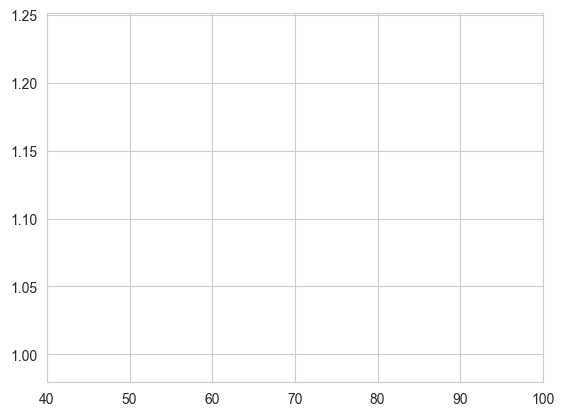

In [14]:
plt.plot(area_mean_1)
plt.plot(area_mean_0)
plt.xlim(40,100)

# 15 celulas en el eje X
# Con expansion_constan= 1 (1./expansion_constant) = 1


[60] [255 256 257 261 262 263]
[38] [132 133 134 141 142 143]
[53] [210 211 212 219 220 221]
[130] [633 634 635 876 877 878]
[140] [702 703 704 789 790 791]
[49] [195 196 197 198 199 200]
[128] [621 622 623 636 637 638]
[73] [264 265 266 348 349 350]
[71] [264 265 266 267 268 269]
[141] [705 706 707 834 835 836]
[129] [609 610 611 702 703 704]
[120] [555 556 557 570 571 572]
[7] [ 18  19  20 126 127 128]
[146] [735 736 737 744 745 746]
[148] [765 766 767 771 772 773]
[41] [132 133 134 144 145 146]
[135] [747 748 749 759 760 761]
[142] [684 685 686 687 688 689]
[107] [426 427 428 516 517 518]
[116] [495 496 497 711 712 713]
[144] [738 739 740 747 748 749]
[124] [558 559 560 600 601 602]
[6] [12 13 14 18 19 20]
[114] [480 481 482 489 490 491]
[14] [33 34 35 42 43 44]
[125] [546 547 548 702 703 704]
[63] [213 214 215 402 403 404]
[19] [ 39  40  41 504 505 506]
[17] [378 379 380 489 490 491]
[15] [ 36  37  38 264 265 266]
[70] [228 229 230 258 259 260]
[126] [510 511 512 540 541 542]
[132]

KeyboardInterrupt: 

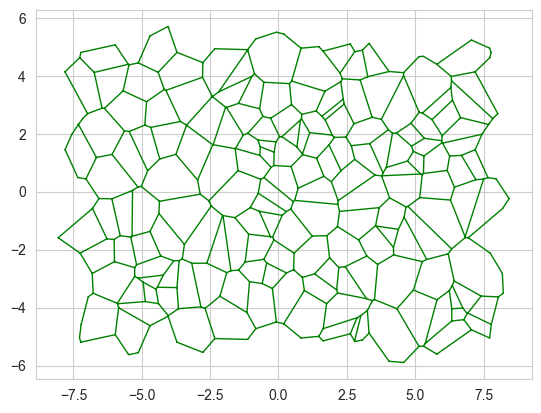

In [7]:
K=0.0 #area elasticity
G= 0.04 #contractility of the cell
L=0.075 #line tensions

#Line tensions can be reduced by increasing cell-cell adhesion or reducing actin- myosin contractility

#run simulation with the choosen parameters
rand =  np.random.RandomState() #random number to choose Lambda
params = [K,G,L]  # K=x[0],G=x[1],L=x[2]
mesh = init.toroidal_random_mesh(15,10,rand=rand)
model.plotting._draw_edges(mesh, plt) 
cells = model.Cells(mesh,properties={'K':K,'Gamma':G,'P':0.0,'boundary_P':P,'Lambda':L, 'Lambda_boundary':0.5, 'A0':1.0})
force = TargetAr
ea() + Tension() + Perimeter() + Pressure()
history_init_15= run(basic_simulation(cells,force),int(50/dt),int(1/dt)) #200/dt
expansion_constant = 1
force = TargetArea() + Tension() + Perimeter() + Pressure()

cells = history_init_15[-1].copy()
cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
cells.properties['parent_group'][cells.mesh.face_ids == 14] = 1
cells.properties['Gamma']= np.array([G,0])[cells.properties['parent_group']]
cells.properties['Lambda']= np.array([L,0.58])[cells.properties['parent_group']]
force = TargetArea() + Tension() + Perimeter() + Pressure()
history_15= run(basic_simulation(cells,force),int(3/dt),int(.010/dt)) #200/dt


(50.0, 95.0)

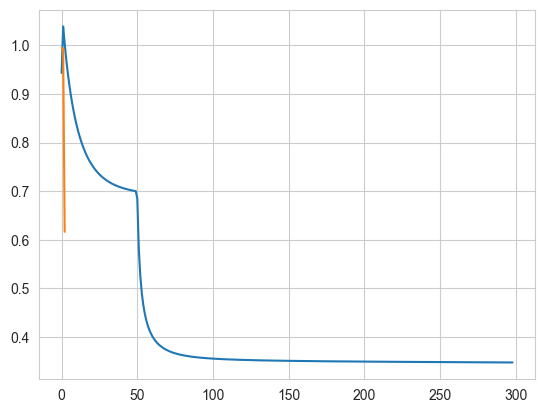

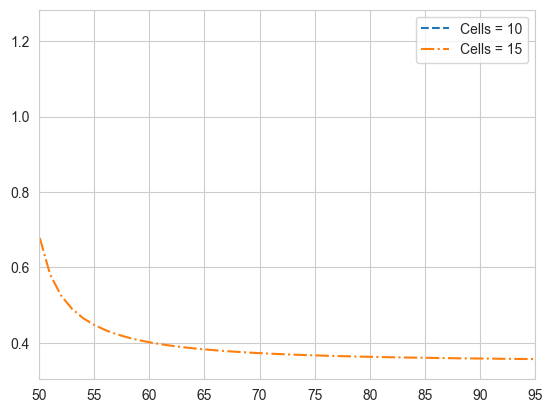

In [22]:
force = TargetArea() + Tension() + Perimeter() + Pressure()
generation_a=[cells.mesh.area for cells in  history_init_15+history_15]
generation_p=[cells.mesh.perimeter for cells in history_15]
generation_n=[np.bincount(cells.mesh.face_id_by_edge) for cells in history_15]
generation_f=[force(cells) for cells in history_15] 
death=[cells.empty() for cells in history_15]
properties= [cells.properties['parent_group'] for cells in history_15]
#mean variables in time
# area_mean=[]
area_mean_0_=[]
area_mean_15_=[]
# perimeter_mean=[]
# neigh_mean=[]
# area_total=[]
# number_cells = []
# ids_face_by_edge = []
for i in range(0,len(history_15)-1):
    valid=np.where(~death[i] & (generation_a[i]>0))[0]
#     number_cells = np.append(number_cells, len(valid))
#     area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
#     area_total=np.append(area_total,np.sum(generation_a[i][valid]))
#     perimeter_mean=np.append(perimeter_mean,np.mean(generation_p[i][valid]))
#     neigh_mean=np.append(neigh_mean,np.mean(generation_n[i][valid]))
    area_mean_15_=np.append(area_mean_15_,np.mean(generation_a[i][properties[i]==1]))
    area_mean_0_=np.append(area_mean_0,np.mean(generation_a[i][properties[i]==0]))
plt.plot(area_mean_15_)
plt.plot(area_mean_0_)
#mean variables in time
plt.figure()

plt.plot(area_mean_1,'--',label='Cells = 10')
# plt.plot(area_mean_0)
plt.plot(area_mean_15_,'-.', label= 'Cells = 15')
# plt.plot(area_mean_0_)
plt.legend()
plt.xlim(50,95)

RuntimeError: Requested MovieWriter (ffmpeg) not available

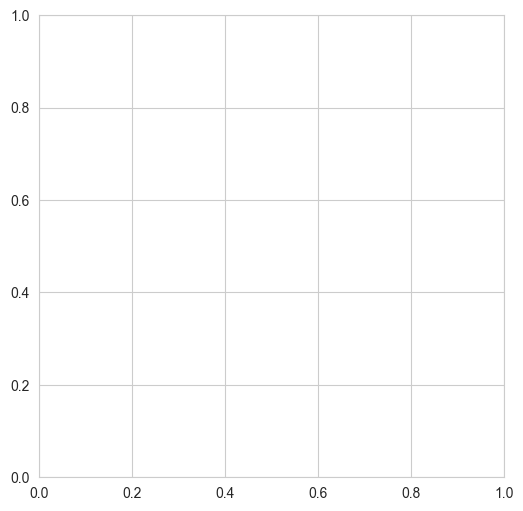

<Figure size 640x480 with 0 Axes>

In [21]:
for cells in history_15:
    cells.properties['color'] = definecolors(cells)
#     cells.properties['color'][cells.mesh.face_ids == 930 ]= 'b'
#     print(cells.mesh.area[cells.mesh.face_ids == 930] )

# definition of the frame for the interactive video
history_15_plot = history_15[0:50]#+history1
fig=plt.figure()
fig.set_size_inches(6,6);
ax = fig.gca()
# initialization function: plot the background of each frame
def init_fig():
    ax = plt.figure();
    return (ax,)
# animation function. This is called sequentially
def animate_fig(i):
    cells_array=history_15_plot
    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))
    size = 2.0*v_max
    cells= history_15_plot[i]
    return model.draw(cells,ax,size)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,
                               frames=(len(history_15_plot)))
HTML(anim.to_html5_video())

# 20 celulas en el eje X
# Con expansion_constan= 1 (1./expansion_constant) = 1


In [ ]:
K=1.0 #area elasticity
G= 0.04 #contractility of the cell
L=0.075 #line tensions

#Line tensions can be reduced by increasing cell-cell adhesion or reducing actin- myosin contractility

#run simulation with the choosen parameters
rand =  np.random.RandomState() #random number to choose Lambda
params = [K,G,L]  # K=x[0],G=x[1],L=x[2]
mesh = init.toroidal_random_mesh(20,10,rand=rand)
cells = model.Cells(mesh,properties={'K':K,'Gamma':G,'P':0.0,'boundary_P':P,'Lambda':L, 'Lambda_boundary':0.5, 'A0':1.0})
force = TargetArea() + Tension() + Perimeter() + Pressure()
history_init_20= run(basic_simulation(cells,force),50/dt,1/dt) #200/dt


In [ ]:
expansion_constant = 1
force = TargetArea() + Tension() + Perimeter() + Pressure()

cells = history_init_20[-1].copy()
cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
cells.properties['parent_group'][cells.mesh.face_ids == 40] = 1
cells.properties['Gamma']= np.array([G,0])[cells.properties['parent_group']]
cells.properties['Lambda']= np.array([L,0.58])[cells.properties['parent_group']]
force = TargetArea() + Tension() + Perimeter() + Pressure()
history_20= run(basic_simulation(cells,force),3/dt,.010/dt) #200/dt

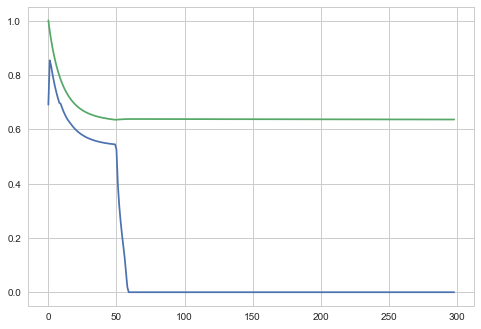

In [ ]:
force = TargetArea() + Tension() + Perimeter() + Pressure()
generation_a=[cells.mesh.area for cells in  history_init_20+history_20]
generation_p=[cells.mesh.perimeter for cells in history_20]
generation_n=[np.bincount(cells.mesh.face_id_by_edge) for cells in history_20]
generation_f=[force(cells) for cells in history_20] 
death=[cells.empty() for cells in history_20]
properties= [cells.properties['parent_group'] for cells in history_20]
#mean variables in time
# area_mean=[]
area_mean_0_=[]
area_mean_1_=[]
# perimeter_mean=[]
# neigh_mean=[]
# area_total=[]
# number_cells = []
# ids_face_by_edge = []
for i in range(0,len(history_20)-1):
    valid=np.where(~death[i] & (generation_a[i]>0))[0]
#     number_cells = np.append(number_cells, len(valid))
#     area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
#     area_total=np.append(area_total,np.sum(generation_a[i][valid]))
#     perimeter_mean=np.append(perimeter_mean,np.mean(generation_p[i][valid]))
#     neigh_mean=np.append(neigh_mean,np.mean(generation_n[i][valid]))
    area_mean_1_=np.append(area_mean_1_,np.mean(generation_a[i][properties[i]==1]))
    area_mean_0_=np.append(area_mean_0_,np.mean(generation_a[i][properties[i]==0]))
plt.plot(area_mean_1_)
plt.plot(area_mean_0_)

(50, 95)

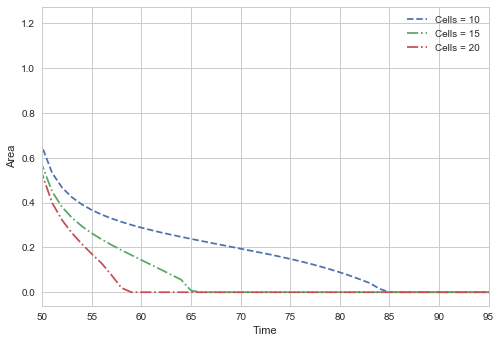

In [ ]:
force = TargetArea() + Tension() + Perimeter() + Pressure()
generation_a=[cells.mesh.area for cells in  history_init_20+history_20]
generation_p=[cells.mesh.perimeter for cells in history_20]
generation_n=[np.bincount(cells.mesh.face_id_by_edge) for cells in history_20]
generation_f=[force(cells) for cells in history_20] 
death=[cells.empty() for cells in history_20]
properties= [cells.properties['parent_group'] for cells in history_20]
#mean variables in time
area_mean=[]
area_mean_0_=[]
area_mean_1_=[]
# perimeter_mean=[]
# neigh_mean=[]
# area_total=[]
# number_cells = []
# ids_face_by_edge = []
for i in range(0,len(history_20)-1):
    valid=np.where(~death[i] & (generation_a[i]>0))[0]
#     number_cells = np.append(number_cells, len(valid))
#     area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
#     area_total=np.append(area_total,np.sum(generation_a[i][valid]))
#     perimeter_mean=np.append(perimeter_mean,np.mean(generation_p[i][valid]))
#     neigh_mean=np.append(neigh_mean,np.mean(generation_n[i][valid]))
    area_mean_1_=np.append(area_mean_1_,np.mean(generation_a[i][properties[i]==1]))
    area_mean_0_=np.append(area_mean_0_,np.mean(generation_a[i][properties[i]==0]))

plt.plot(area_mean_1,'--',label='Cells = 10')
# plt.plot(area_mean_0)

plt.plot(area_mean_15_,'-.', label= 'Cells = 15')
plt.plot(area_mean_1_,'-.', label= 'Cells = 20')
# plt.plot(area_mean_0_)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Area')
plt.xlim(50,95)

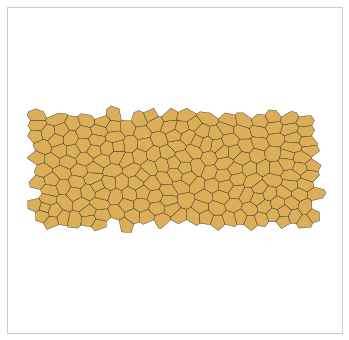

In [ ]:
for cells in history_20:
    cells.properties['color'] = definecolors(cells)
#     cells.properties['color'][cells.mesh.face_ids == 930 ]= 'b'
#     print(cells.mesh.area[cells.mesh.face_ids == 930] )

# definition of the frame for the interactive video
history_20_plot = history_20#[0:50]#+history1
fig=plt.figure()
fig.set_size_inches(6,6);
ax = fig.gca()
# initialization function: plot the background of each frame
def init_fig():
    ax = plt.figure();
    return (ax,)
# animation function. This is called sequentially
def animate_fig(i):
    cells_array=history_20_plot
    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))
    size = 2.0*v_max
    cells= history_20_plot[i]
    return model.draw(cells,ax,size)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,
                               frames=(len(history_20_plot)))
HTML(anim.to_html5_video())

# Pintar frames y video

In [ ]:
# # Pintar frames
# def animate(cells_array, facecolours='Default'):
#     v_max = np.max((np.max(cells_array[0].mesh.vertices), np.max(cells_array[-1].mesh.vertices)))
#     size = 2.0*v_max
#     #to don't draw 
#     fig = plt.figure()#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
#     ax = fig.gca()#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
#     fig.set_size_inches(6, 6)#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
#     for cells in cells_array:#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
#         draw(cells, ax, size)#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
#   #hasta aqui to don't draw        

# def draw1(cells, ax=None, size=None):
#     if not ax:
#         fig = plt.figure()
#         ax = fig.gca()  
#     ax.cla()
#     facecolors = cells.properties.get('color', None)

#     mesh = cells.mesh.recentre()

#     if facecolors is None:
#         _draw_edges_non(mesh, ax)
#     else:
#         _draw_faces_no_edge(mesh, ax, facecolors)
#     _draw_geometry(mesh.geometry, ax)

#     ax.set_xticks([])
#     ax.set_yticks([])

#     size = size or 2.0*np.max(mesh.vertices[0])
#     lim = [-0.55*size, 0.55*size]
#     ax.set_xlim(lim)
#     ax.set_ylim(lim)


        
# def animate_video_mpg(cells_array,name_file,facecolours='Default'):    
#     v_max = np.max((np.max(cells_array[0].mesh.vertices), np.max(cells_array[-1].mesh.vertices)))
#     size = 2.0*v_max
#     outputdir=name_file
#     if not os.path.exists(outputdir): # if the folder doesn't exist create it
#         os.makedirs(outputdir)
#     fig = plt.figure(); 
#     ax = fig.gca(); 
#     fig.set_size_inches(6,6); 
#     i=0
#     frames=[]
#     for cells in cells_array:
#         model.draw(cells,ax,size)
#         i=i+1
#         frame=name_file+"/image%03i.png" % i
#         fig.savefig(frame,dpi=500)
#         frames.append(frame)  
# #     os.system("mencoder 'mf://images/image*.png' -mf type=png:fps=20 -ovc lavc -lavcopts vcodec=wmv2 -oac copy  -o " + name_file)  
#     os.system("ffmpeg -framerate 5/1 -i "+name_file+"/image%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p "+ name_file+".mp4") #for Mac computer
# #     for frame in frames: os.remove(frame)

# def animate_video_mpg_zoom(cells_array,name_file,facecolours='Default'):    
#     v_max = np.max((np.max(cells_array[0].mesh.vertices[1]), np.max(cells_array[-1].mesh.vertices[1])))
#     size = 2.0*v_max
#     outputdir="images"
#     if not os.path.exists(outputdir): # if the folder doesn't exist create it
#         os.makedirs(outputdir)
#     fig = plt.figure(); 
#     ax = fig.gca(); 
#     fig.set_size_inches(6,6); 
#     i=0
#     frames=[]
#     for cells in cells_array:
#         draw(cells,ax,size)
#         i=i+1
#         frame="images/zoom_image%03i.png" % i
#         fig.savefig(frame,dpi=500)
#         frames.append(frame)  
#     os.system("mencoder 'mf://images/zoom_image*.png' -mf type=png:fps=20 -ovc lavc -lavcopts vcodec=wmv2 -oac copy  -o " + name_file)  
#     # os.system("ffmpeg -framerate 5/1 -i images/image%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p test.mp4") #for Mac computer
# #     for frame in frames: os.remove(frame)

In [ ]:
# animate_video_mpg(history_10_plot[0:40],"cell10",facecolours='Default')

In [ ]:
# animate_video_mpg(history_20_plot[0:40],"cells20",facecolours='Default')

In [ ]:
# animate_video_mpg(history_15_plot[0:40],"cells15",facecolours='Default')